## Task 06

## Note
Model evaluation and parameter tuning for classification model

1)GridSearchCV
2)RandomizedSearchCV 

compare these two methods, randomized search CV took significantly less time.
however, the gridsearch CV returned slightly better model. (which makes sense because of the 'brute force' style search)

3)Matrix and ROC curve (for binary classification problem)
TP: 40
TN: 71
FP: 1
FN: 2

Exercise:

In [20]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
data = fetch_lfw_people(min_faces_per_person=60)

In [21]:
print(data.target_names)
print(data.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


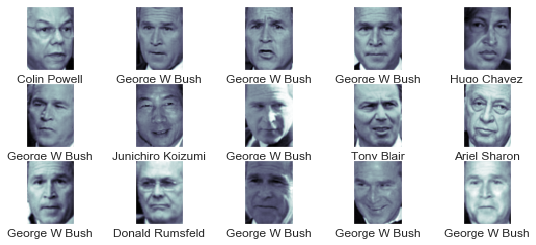

In [22]:
sns.set()
fig, ax = plt.subplots(3,5)
fig.subplots_adjust(left=0.0625, right=1.2, wspace=1)

for i, axi in enumerate(ax.flat):
    axi.imshow(data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=data.target_names[data.target[i]])


In [23]:
pca = PCA(n_components=150, whiten=True, random_state=17)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=17)

param_grid = {'svc__C': [1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(x_train, y_train)
print(grid.best_params_)
{'svc__C': 10, 'svc__gamma': 0.001}

{'svc__C': 5, 'svc__gamma': 0.005}


{'svc__C': 10, 'svc__gamma': 0.001}

Text(0.5, 0.98, 'Predicted Names; Incorect Lables in Red')

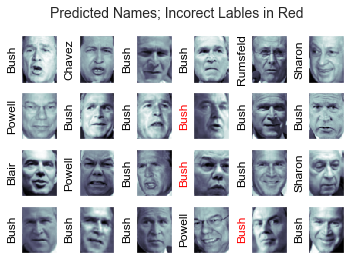

In [26]:
model = grid.best_estimator_
y_fit = model.predict(x_test)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(data.target_names[y_fit[i]].split()[-1],
                  color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorect Lables in Red', size=14)


In [28]:
print(classification_report(y_test, y_fit, target_names=data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.73      0.84        22
     Colin Powell       0.79      0.93      0.86        58
  Donald Rumsfeld       0.95      0.64      0.76        33
    George W Bush       0.80      0.97      0.88       127
Gerhard Schroeder       0.84      0.67      0.74        24
      Hugo Chavez       0.92      0.61      0.73        18
Junichiro Koizumi       1.00      0.63      0.77        19
       Tony Blair       0.86      0.83      0.85        36

         accuracy                           0.84       337
        macro avg       0.90      0.75      0.80       337
     weighted avg       0.86      0.84      0.83       337



Text(73.64857142857144, 0.5, 'predicted label')

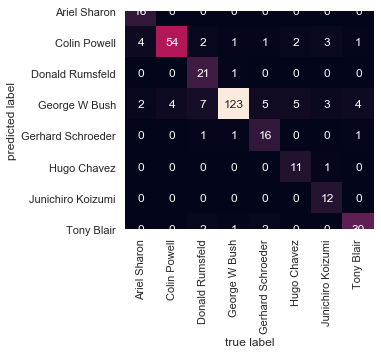

In [30]:

mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
